In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

In [2]:
remote_url = "https://raw.githubusercontent.com/prodramp/publiccode/master/datasets/supermarket_sales.csv"

In [3]:
dfs = pd.read_csv(remote_url)

In [4]:
dfs

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [5]:
dfs.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [6]:
dfs[['City', 'Product line', 'Total']]

,City,Product line,Total
0,Yangon,Health and beauty,548.9715
1,Naypyitaw,Electronic accessories,80.2200
2,Yangon,Home and lifestyle,340.5255
3,Yangon,Health and beauty,489.0480
4,Yangon,Sports and travel,634.3785
...,...,...,...
995,Naypyitaw,Health and beauty,42.3675
996,Mandalay,Home and lifestyle,1022.4900
997,Yangon,Food and beverages,33.4320
998,Yangon,Home and lifestyle,69.1110


In [7]:
dfs.groupby('City').size()

City
Mandalay     332
Naypyitaw    328
Yangon       340
dtype: int64

In [8]:
dfs.groupby('Product line').size()

Product line
Electronic accessories    170
Fashion accessories       178
Food and beverages        174
Health and beauty         152
Home and lifestyle        160
Sports and travel         166
dtype: int64

In [9]:
#dfs['payment_total_result'] = 
dfsf = dfs.groupby(['City', 'Product line'])['Total'].apply(sum).reset_index()

In [10]:
dfsf

,City,Product line,Total
0,Mandalay,Electronic accessories,17051.4435
1,Mandalay,Fashion accessories,16413.3165
2,Mandalay,Food and beverages,15214.8885
3,Mandalay,Health and beauty,19980.6600
4,Mandalay,Home and lifestyle,17549.1645
5,Mandalay,Sports and travel,19988.1990
6,Naypyitaw,Electronic accessories,18968.9745
7,Naypyitaw,Fashion accessories,21560.0700
8,Naypyitaw,Food and beverages,23766.8550
9,Naypyitaw,Health and beauty,16615.3260


In [18]:
dfx = dfsf.pivot(index ='City', columns ='Product line')

In [19]:
dfx

Total                                         \
Product line Electronic accessories Fashion accessories Food and beverages   
City                                                                         
Mandalay                 17051.4435          16413.3165         15214.8885   
Naypyitaw                18968.9745          21560.0700         23766.8550   
Yangon                   18317.1135          16332.5085         17163.1005   

                                                                     
Product line Health and beauty Home and lifestyle Sports and travel  
City                                                                 
Mandalay             19980.660         17549.1645        19988.1990  
Naypyitaw            16615.326         13895.5530        15761.9280  
Yangon               12597.753         22417.1955        19372.6995

In [20]:
dfx.columns

MultiIndex([('Total', 'Electronic accessories'),
            ('Total',    'Fashion accessories'),
            ('Total',     'Food and beverages'),
            ('Total',      'Health and beauty'),
            ('Total',     'Home and lifestyle'),
            ('Total',      'Sports and travel')],
           names=[None, 'Product line'])

In [27]:
dfx = dfsf.pivot(index ='City', columns ='Product line', values = 'Total')

In [28]:
dfx

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
City,,,,,,
Mandalay,17051.4435,16413.3165,15214.8885,19980.660,17549.1645,19988.1990
Naypyitaw,18968.9745,21560.0700,23766.8550,16615.326,13895.5530,15761.9280
Yangon,18317.1135,16332.5085,17163.1005,12597.753,22417.1955,19372.6995


In [29]:
dfx.columns

Index(['Electronic accessories', 'Fashion accessories', 'Food and beverages',
       'Health and beauty', 'Home and lifestyle', 'Sports and travel'],
      dtype='object', name='Product line')

In [30]:
dfx.values

array([[17051.4435, 16413.3165, 15214.8885, 19980.66  , 17549.1645,
        19988.199 ],
       [18968.9745, 21560.07  , 23766.855 , 16615.326 , 13895.553 ,
        15761.928 ],
       [18317.1135, 16332.5085, 17163.1005, 12597.753 , 22417.1955,
        19372.6995]])

In [31]:
dfx = dfsf.pivot(index ='City', columns ='Product line', values = 'Total').reset_index()

In [32]:
dfx

Product line,City,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
0,Mandalay,17051.4435,16413.3165,15214.8885,19980.660,17549.1645,19988.1990
1,Naypyitaw,18968.9745,21560.0700,23766.8550,16615.326,13895.5530,15761.9280
2,Yangon,18317.1135,16332.5085,17163.1005,12597.753,22417.1955,19372.6995


In [33]:
dfx.values

array([['Mandalay', 17051.443499999998, 16413.3165, 15214.8885,
        19980.659999999996, 17549.1645, 19988.199000000004],
       ['Naypyitaw', 18968.9745, 21560.07, 23766.854999999996,
        16615.325999999997, 13895.553, 15761.928],
       ['Yangon', 18317.1135, 16332.5085, 17163.100499999997, 12597.753,
        22417.195500000005, 19372.699500000002]], dtype=object)

In [34]:
dfx.columns

Index(['City', 'Electronic accessories', 'Fashion accessories',
       'Food and beverages', 'Health and beauty', 'Home and lifestyle',
       'Sports and travel'],
      dtype='object', name='Product line')

In [35]:
dfx = dfx[['City', 'Electronic accessories', 'Fashion accessories',
       'Food and beverages', 'Health and beauty', 'Home and lifestyle',
       'Sports and travel']]

In [36]:
dfx

Product line,City,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
0,Mandalay,17051.4435,16413.3165,15214.8885,19980.660,17549.1645,19988.1990
1,Naypyitaw,18968.9745,21560.0700,23766.8550,16615.326,13895.5530,15761.9280
2,Yangon,18317.1135,16332.5085,17163.1005,12597.753,22417.1955,19372.6995


In [37]:
dfx.set_index('City')

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
City,,,,,,
Mandalay,17051.4435,16413.3165,15214.8885,19980.660,17549.1645,19988.1990
Naypyitaw,18968.9745,21560.0700,23766.8550,16615.326,13895.5530,15761.9280
Yangon,18317.1135,16332.5085,17163.1005,12597.753,22417.1955,19372.6995


In [38]:
dfx['Electronic accessories']

0    17051.4435
1    18968.9745
2    18317.1135
Name: Electronic accessories, dtype: float64

In [39]:
dfx.values

array([['Mandalay', 17051.443499999998, 16413.3165, 15214.8885,
        19980.659999999996, 17549.1645, 19988.199000000004],
       ['Naypyitaw', 18968.9745, 21560.07, 23766.854999999996,
        16615.325999999997, 13895.553, 15761.928],
       ['Yangon', 18317.1135, 16332.5085, 17163.100499999997, 12597.753,
        22417.195500000005, 19372.699500000002]], dtype=object)

In [40]:
dfx

Product line,City,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
0,Mandalay,17051.4435,16413.3165,15214.8885,19980.660,17549.1645,19988.1990
1,Naypyitaw,18968.9745,21560.0700,23766.8550,16615.326,13895.5530,15761.9280
2,Yangon,18317.1135,16332.5085,17163.1005,12597.753,22417.1955,19372.6995


In [41]:
dfx.columns

Index(['City', 'Electronic accessories', 'Fashion accessories',
       'Food and beverages', 'Health and beauty', 'Home and lifestyle',
       'Sports and travel'],
      dtype='object', name='Product line')

In [42]:
dfx.reset_index()

Product line,index,City,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
0,0,Mandalay,17051.4435,16413.3165,15214.8885,19980.660,17549.1645,19988.1990
1,1,Naypyitaw,18968.9745,21560.0700,23766.8550,16615.326,13895.5530,15761.9280
2,2,Yangon,18317.1135,16332.5085,17163.1005,12597.753,22417.1955,19372.6995


In [44]:
dfx.reset_index(drop=True, inplace=True)

In [45]:
dfx

Product line,City,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
0,Mandalay,17051.4435,16413.3165,15214.8885,19980.660,17549.1645,19988.1990
1,Naypyitaw,18968.9745,21560.0700,23766.8550,16615.326,13895.5530,15761.9280
2,Yangon,18317.1135,16332.5085,17163.1005,12597.753,22417.1955,19372.6995


In [46]:
dfx.columns

Index(['City', 'Electronic accessories', 'Fashion accessories',
       'Food and beverages', 'Health and beauty', 'Home and lifestyle',
       'Sports and travel'],
      dtype='object', name='Product line')

In [ ]:
## The following will give you an error
## dfx.drop('Product line', axis=1, inplace=True)

In [47]:
dfx = dfx.rename_axis(None, axis=1)

In [48]:
dfx

,City,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
0,Mandalay,17051.4435,16413.3165,15214.8885,19980.660,17549.1645,19988.1990
1,Naypyitaw,18968.9745,21560.0700,23766.8550,16615.326,13895.5530,15761.9280
2,Yangon,18317.1135,16332.5085,17163.1005,12597.753,22417.1955,19372.6995


In [49]:
dfx.columns

Index(['City', 'Electronic accessories', 'Fashion accessories',
       'Food and beverages', 'Health and beauty', 'Home and lifestyle',
       'Sports and travel'],
      dtype='object')

In [50]:
dfx

,City,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
0,Mandalay,17051.4435,16413.3165,15214.8885,19980.660,17549.1645,19988.1990
1,Naypyitaw,18968.9745,21560.0700,23766.8550,16615.326,13895.5530,15761.9280
2,Yangon,18317.1135,16332.5085,17163.1005,12597.753,22417.1955,19372.6995


In [52]:
dfx[['City','Electronic accessories', 'Fashion accessories', 'Food and beverages',
       'Health and beauty', 'Home and lifestyle']]

,City,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle
0,Mandalay,17051.4435,16413.3165,15214.8885,19980.660,17549.1645
1,Naypyitaw,18968.9745,21560.0700,23766.8550,16615.326,13895.5530
2,Yangon,18317.1135,16332.5085,17163.1005,12597.753,22417.1955


In [53]:
dfx

,City,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
0,Mandalay,17051.4435,16413.3165,15214.8885,19980.660,17549.1645,19988.1990
1,Naypyitaw,18968.9745,21560.0700,23766.8550,16615.326,13895.5530,15761.9280
2,Yangon,18317.1135,16332.5085,17163.1005,12597.753,22417.1955,19372.6995


In [54]:
rows = list(dfx['City'])
print(rows)

['Mandalay', 'Naypyitaw', 'Yangon']


In [55]:
dfx.drop('City', axis=1, inplace=True)

In [56]:
dfx

,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
0,17051.4435,16413.3165,15214.8885,19980.660,17549.1645,19988.1990
1,18968.9745,21560.0700,23766.8550,16615.326,13895.5530,15761.9280
2,18317.1135,16332.5085,17163.1005,12597.753,22417.1955,19372.6995


In [57]:
dfx.columns

Index(['Electronic accessories', 'Fashion accessories', 'Food and beverages',
       'Health and beauty', 'Home and lifestyle', 'Sports and travel'],
      dtype='object')

In [58]:
columns = list(dfx.columns)
print(columns)

['Electronic accessories', 'Fashion accessories', 'Food and beverages', 'Health and beauty', 'Home and lifestyle', 'Sports and travel']


In [59]:
df1=dfx.values

In [60]:
df1

array([[17051.4435, 16413.3165, 15214.8885, 19980.66  , 17549.1645,
        19988.199 ],
       [18968.9745, 21560.07  , 23766.855 , 16615.326 , 13895.553 ,
        15761.928 ],
       [18317.1135, 16332.5085, 17163.1005, 12597.753 , 22417.1955,
        19372.6995]])

In [61]:
df1=dfx.values
print(dfx.isnull().sum())
print(df1)

Electronic accessories    0
Fashion accessories       0
Food and beverages        0
Health and beauty         0
Home and lifestyle        0
Sports and travel         0
dtype: int64
[[17051.4435 16413.3165 15214.8885 19980.66   17549.1645 19988.199 ]
 [18968.9745 21560.07   23766.855  16615.326  13895.553  15761.928 ]
 [18317.1135 16332.5085 17163.1005 12597.753  22417.1955 19372.6995]]


In [62]:
len(df1[0])

6

In [63]:
len(df1[:,0])

3

In [64]:
df1.flatten()

array([17051.4435, 16413.3165, 15214.8885, 19980.66  , 17549.1645,
       19988.199 , 18968.9745, 21560.07  , 23766.855 , 16615.326 ,
       13895.553 , 15761.928 , 18317.1135, 16332.5085, 17163.1005,
       12597.753 , 22417.1955, 19372.6995])

/Users/avkash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  
/Users/avkash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/avkash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


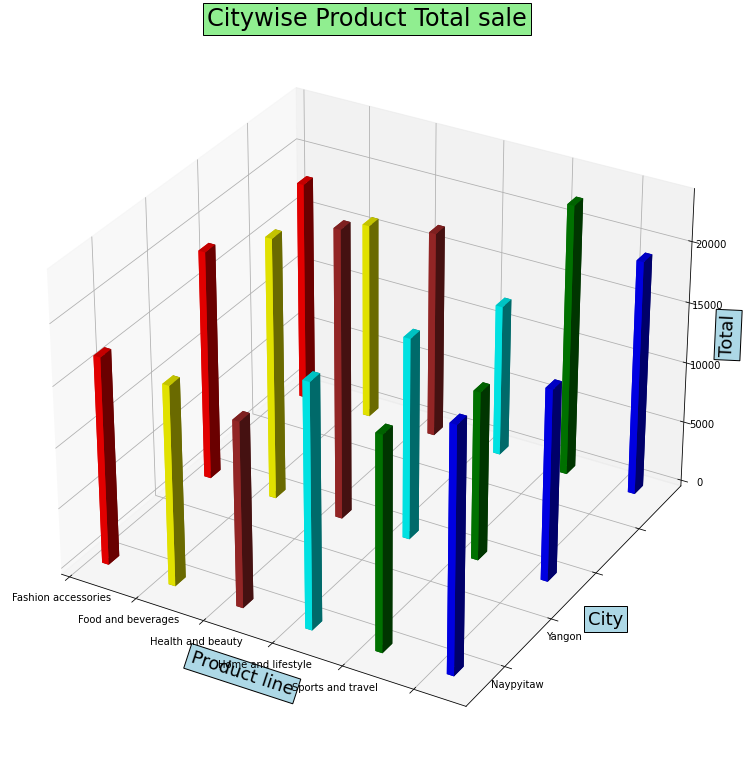

In [65]:
fig = plt.figure(figsize=(26, 10))
ax = Axes3D(fig)
lx = len(df1[0])
ly = len(df1[:,0])
xpos = np.arange(0, lx, 1)
ypos = np.arange(0, ly, 1)
xpos, ypos = np.meshgrid(xpos + 0.25, ypos + 0.25) 

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(lx*ly)
dx = 0.1*np.ones_like(zpos) # change value from 0.1 to 0.5 for 3D bar width
dy = dx.copy()
dz = df1.flatten()
colors = ['red', 'yellow', 'brown', 'cyan', 'green', 'blue']*ly

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color = colors) 
ax.w_xaxis.set_ticklabels(columns)
ax.w_yaxis.set_ticklabels(rows)
ax.set_xlabel('Product line', bbox={'facecolor':'lightblue', }, fontsize=18)
ax.set_ylabel('City', bbox={'facecolor':'lightblue', },fontsize=18)
ax.set_zlabel('Total', bbox={'facecolor':'lightblue', },fontsize=18)
plt.title('Citywise Product Total sale', fontdict={'fontsize': 24, 'fontweight': 'medium'}, bbox={'facecolor':'lightgreen', })
plt.show()

In [66]:
def bar_graph_3d(sourceDf, xLabel, yLabel, zLabel, heading):
    fig = plt.figure(figsize=(26, 10))
    ax = Axes3D(fig)
    lx = len(sourceDf[0])
    ly = len(sourceDf[:,0])
    xpos = np.arange(0, lx, 1)
    ypos = np.arange(0, ly, 1)
    xpos, ypos = np.meshgrid(xpos + 0.25, ypos + 0.25) 

    xpos = xpos.flatten()
    ypos = ypos.flatten()
    zpos = np.zeros(lx*ly)
    dx = 0.1*np.ones_like(zpos) # change value from 0.1 to 0.5 for 3D bar width
    dy = dx.copy()
    dz = sourceDf.flatten()
    colors = ['red', 'yellow', 'brown', 'cyan', 'green', 'blue']*ly

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color = colors) 
    ax.w_xaxis.set_ticklabels(columns)
    ax.w_yaxis.set_ticklabels(rows)
    ax.set_xlabel(xLabel, bbox={'facecolor':'lightblue', }, fontsize=18)
    ax.set_ylabel(yLabel, bbox={'facecolor':'lightblue', },fontsize=18)
    ax.set_zlabel(zLabel, bbox={'facecolor':'lightblue', },fontsize=18)
    plt.title(heading, fontdict={'fontsize': 24, 'fontweight': 'medium'}, bbox={'facecolor':'lightgreen', })
    plt.show()

/Users/avkash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/avkash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/avkash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


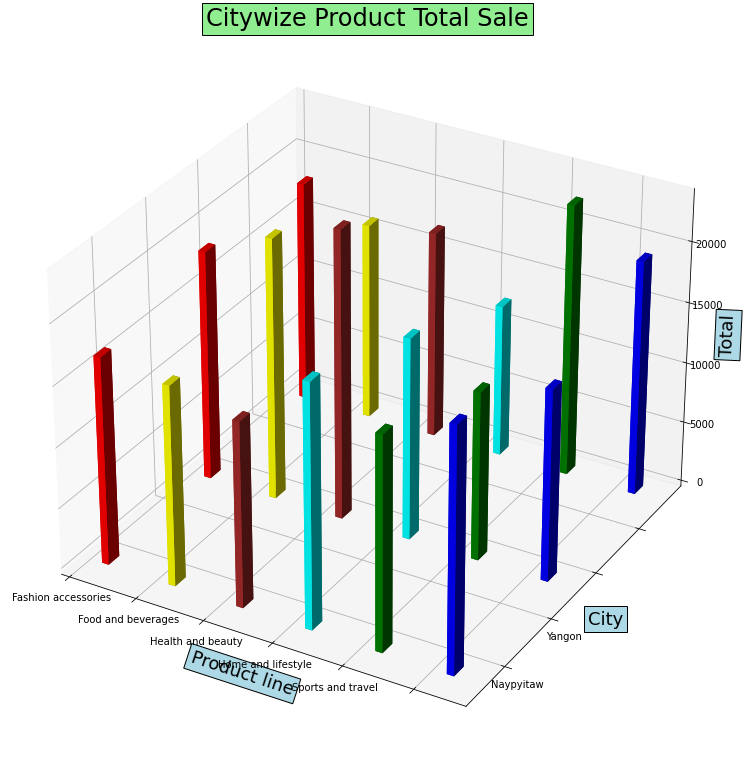

In [67]:
bar_graph_3d(df1, 'Product line', 'City', 'Total', 'Citywize Product Total Sale')

In [68]:
import warnings
warnings.filterwarnings("ignore")

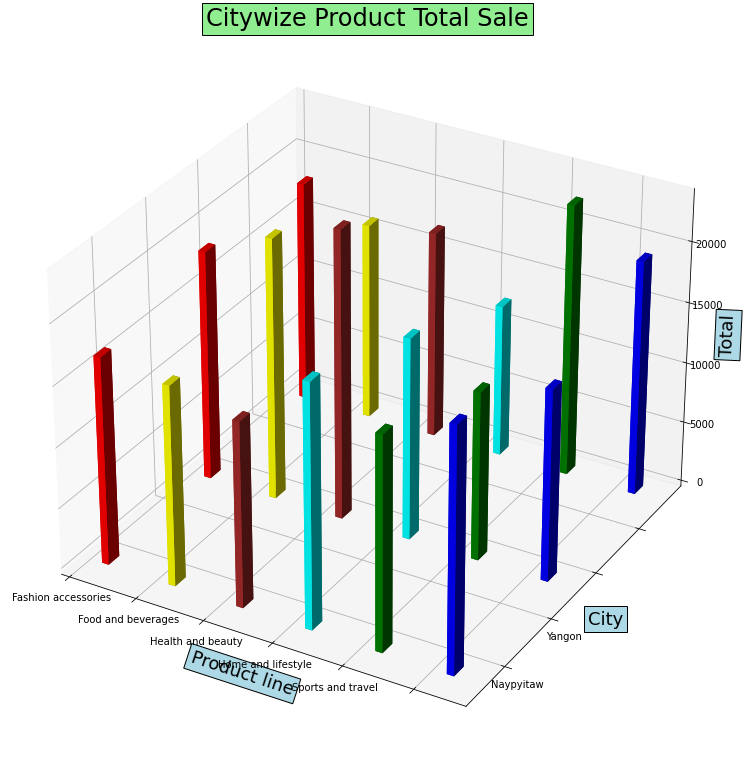

In [69]:
bar_graph_3d(df1, 'Product line', 'City', 'Total', 'Citywize Product Total Sale')